Importing the Dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [43]:
# loading the csv data to a Pandas DataFrame
brain_data = pd.read_csv('/content/brain_stoke_Test.csv')

In [44]:
# print first 5 rows of the dataset
brain_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [45]:
# print last 5 rows of the dataset
brain_data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [46]:
# number of rows and columns in the dataset
brain_data.shape

(4981, 11)

In [47]:
# getting some info about the data
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [48]:
# checking for missing values
brain_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
# statistical measures about the data
brain_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [88]:
x_axis =brain_data['age']
y_axis =brain_data['bmi']

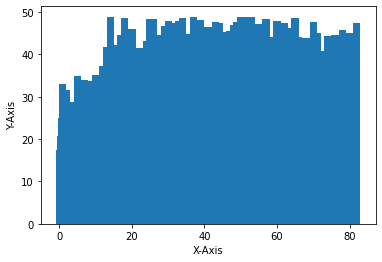

In [91]:
plt.bar(x_axis, y_axis, width=2)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

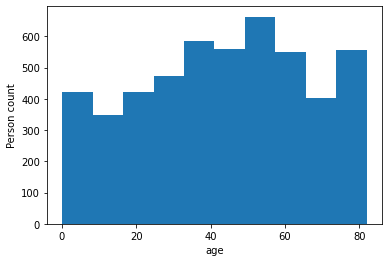

In [85]:
age =brain_data['age']
plt.hist(age)
plt.xlabel('age')
plt.ylabel('Person count')
plt.show()


In [50]:
# checking the distribution of Target Variable
brain_data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

1 -->  brain stroke

0 --> Healthy brain

Splitting the Features and Target

In [51]:
X = brain_data.drop(columns='stroke', axis=1)
Y = brain_data['stroke']

In [52]:
print(X)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

In [53]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64


# ReModificaiton of dataset

In [54]:
# replace the values in binary 
brain_data.head(2)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [55]:
df = brain_data.copy(deep=True)


In [56]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [57]:
df['gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)

In [58]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [59]:
df['work_type'].replace(['Private', 'Self-employed','Govt_job','children'],
                        [0, 1,2,3], inplace=True)

In [60]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,0,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,0,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,0,Urban,171.23,34.4,smokes,1


In [61]:
df['ever_married'].replace(['Yes', 'No'],[0, 1], inplace=True)



In [62]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,0,0,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,0,0,Urban,171.23,34.4,smokes,1


In [63]:
df['Residence_type'].replace(['Urban','Rural'],[0, 1], inplace=True)



In [64]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,0,0,1,105.92,32.5,never smoked,1
2,1,49.0,0,0,0,0,0,171.23,34.4,smokes,1


In [65]:
df['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'],[0,1,2,3], inplace=True)

In [66]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1


In [67]:
df_new = df.copy(deep=True)


In [68]:
df_new.to_csv('brains_Stroke_new.csv')

In [69]:
df_new.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,0,80.0,0,1,0,0,1,105.92,32.5,1,1
2,1,49.0,0,0,0,0,0,171.23,34.4,2,1


Splitting the Data into Training data & Test Data

In [70]:
X = df_new.drop(columns='stroke', axis=1)
Y = df_new['stroke']

In [71]:
X.head(1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0


In [72]:
Y.head(1)

0    1
Name: stroke, dtype: int64

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(4981, 10) (3486, 10) (1495, 10)


Model Training

Logistic Regression

In [75]:
model = LogisticRegression()

In [76]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [77]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [78]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9503729202524384


In [79]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [92]:
print('Accuracy on Test data : ', test_data_accuracy)
X.head(1)

Accuracy on Test data :  0.9505016722408027


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,0,0,0,228.69,36.6,0


Building a Predictive System

In [81]:
input_data = (0,67,0,1,0,0,0,580.69,36.6,2)


# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a brain stroke Disease')
else:
  print('The Person has brain stroke Disease')

[0]
The Person does not have a brain stroke Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
